# Import des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement du fichier

In [2]:
data=pd.read_csv('Data_cleané.csv',index_col=0)

In [3]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,TotalGHGEmissionsLog,SiteEnergyUse(kBtu)Log
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,...,6981428.0,2023032.0,3686160.0,1272388.0,No,Compliant,249.43,2.64,2.396949,6.843944
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,...,8354235.0,0.0,3905411.0,4448985.0,No,Compliant,263.51,2.38,2.420797,6.921907
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,...,73130656.0,19660404.0,49762435.0,3709900.0,Yes,Compliant,2061.48,1.92,3.314179,7.864099
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,...,28229320.0,23458518.0,2769023.0,2001894.0,No,Compliant,1936.34,31.38,3.286982,7.450700
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,...,14829099.0,0.0,6066245.0,8763105.0,No,Compliant,507.70,4.02,2.705607,7.171115


# Analyse des features

In [4]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'TotalGHGEmissionsLog',
       'SiteEnergyUse(kBtu)Log'],
      dtype='object')

Dans les colonnes importantes, notre analyse nous mène vers les variables suivantes : 'PrimaryPropertyType', 'Neighborhood', 'YearBuilt', 'NumberofBuildings','NumberofFloors', 'PropertyGFAParking', 'ENERGYSTARScore', 'PropertyGFATotalLog', 'SiteEnergyUse(kBtu)Log','TotalGHGEmissionsLog']. On supprime donc les colonnes qui ne nous serviront pas pour notre entrainement de Machine Learning

In [5]:
data.drop(['OSEBuildingID', 'BuildingType', 'PropertyName', 'TaxParcelIdentificationNumber','CouncilDistrictCode','ListOfAllPropertyUseTypes', 'SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'DefaultData','ComplianceStatus', 'LargestPropertyUseType','DataYear'], axis=1, inplace=True)

In [6]:
data.columns

Index(['PrimaryPropertyType', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'TotalGHGEmissionsLog',
       'SiteEnergyUse(kBtu)Log'],
      dtype='object')

Nous prenons des variables numériques "numeric" et des variables catégorielles "categ" pour notre étude. 

In [7]:
numeric = data.select_dtypes(include=['int64','float64'])
categ = data.select_dtypes(exclude=['int64','float64'])

Suite à l'analyse des différentes features, les variables catégorielles que nous prendrons pour cette étude sont "Neighborhood" et "PrimaryPropertyType". Analysons déjà le contenu de ces variables.

In [8]:
data['PrimaryPropertyType'].value_counts(dropna=False)

Small- and Mid-Sized Office    584
Other                          497
Large Office                   341
K-12 School                    266
Mixed Use Property             220
Retail Store                   190
Warehouse                      187
Non-Refrigerated Warehouse     184
Hotel                          149
Worship Facility               143
Medical Office                  82
Distribution Center             55
Distribution Center\n           51
Senior Care Community           39
Supermarket / Grocery Store     39
Supermarket/Grocery Store       36
Self-Storage Facility           29
Self-Storage Facility\n         27
Refrigerated Warehouse          25
University                      24
Residence Hall                  21
College/University              21
Hospital                        20
Residence Hall/Dormitory        15
Restaurant                      12
Restaurant\n                    11
Laboratory                      11
Low-Rise Multifamily             5
SPS-District K-12   

In [9]:
data['Neighborhood'].value_counts(dropna=False)

DOWNTOWN                  721
GREATER DUWAMISH          683
MAGNOLIA / QUEEN ANNE     298
LAKE UNION                295
NORTHEAST                 243
EAST                      241
NORTHWEST                 167
BALLARD                   130
NORTH                     121
CENTRAL                   102
SOUTHEAST                  91
DELRIDGE                   87
SOUTHWEST                  83
North                       9
Ballard                     6
Northwest                   5
Delridge                    4
Central                     4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

Nous remarquons que les variables catégorielles peuvent être divisées en plusieurs groupes. Pour la feature "PrimaryPropertyType", on distingue plusieurs types de constructions non résidentielles : Des constructions de famille, des batiments de travail, des batiments éducatifs, des batiments de stockage et des batiments de vie commerciale. Nous allons donc diviser les contenants en sous parties.

In [10]:
data['PrimaryPropertyType'] = data['PrimaryPropertyType'].replace(to_replace =['Small- and Mid-Sized Office', 'Large Office','Office'], value ="Office")

data['PrimaryPropertyType'] = data['PrimaryPropertyType'].replace(to_replace =['Medical Office', 'Laboratory', 'Hospital', 'Senior Care Community'], value ="Medical")

data['PrimaryPropertyType'] = data['PrimaryPropertyType'].replace(to_replace =['K-12 School', 'University', 'Residence Hall','College/University', 'Residence Hall/Dormitory', 'Residence Hall/Dormitory', 'SPS-District K-12'], value ="Education")

data['PrimaryPropertyType']  = data['PrimaryPropertyType'].replace(to_replace =['Warehouse', 'Refrigerated Warehouse', 'Non-Refrigerated Warehouse', 'Self-Storage Facility','Self-Storage Facility\n'], value ="Storage")

data['PrimaryPropertyType'] = data['PrimaryPropertyType'].replace(to_replace =['Retail Store','Distribution Center','Mixed Use Property', 'Distribution Center\n','Supermarket / Grocery Store','Supermarket/Grocery Store', 'Restaurant', 'Restaurant\n'], value ="Commercial")

data['PrimaryPropertyType'] = data['PrimaryPropertyType'].replace(to_replace =['Low-Rise Multifamily'], value ="Family")

data['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Commercial', 'Education', 'Office', 'Storage',
       'Medical', 'Worship Facility', 'Family'], dtype=object)

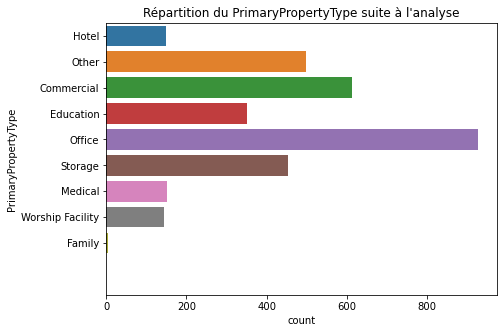

In [11]:
plt.figure(figsize=(7,5))
sns.countplot(y="PrimaryPropertyType", data=data)
plt.ylim(10)
plt.ylabel("PrimaryPropertyType")
plt.title("Répartition du PrimaryPropertyType suite à l'analyse")
plt.show()

Le même raisonnement est effectué pour le "Neighborhood". Suite à une analyse géographique de tous les voisinages proposés, nous pouvons les répertorier sur 4 catégories : Le nord, le sud, l'ouest et le centre/est.

In [ ]:
#North = 'NORTHEAST', 'NORTH ', 'North', 'NORTHWEST', 'Northwest'
#West = [['BALLARD', 'Ballard' 'MAGNOLIA / QUEEN ANNE', 'Delridge', 'DELRIDGE NEIGHBORHOODS', 'DELRIDGE', 'GREATER DUWAMISH']]
#South = [['SOUTHWEST','SOUTHEAST', 'LAKE UNION']]
#Center_East = [['DOWNTOWN', 'Central', 'CENTRAL', 'EAST']]

In [12]:
data['Neighborhood'] = data['Neighborhood'].replace(to_replace =['NORTHEAST', 'NORTH', 'North', 'NORTHWEST', 'Northwest'],
                                                    value ="North")

data['Neighborhood'] = data['Neighborhood'].replace(to_replace =['BALLARD', 'West', 'Ballard', 'MAGNOLIA / QUEEN ANNE', 'Delridge',
                                                                 'DELRIDGE NEIGHBORHOODS', 'DELRIDGE', 'GREATER DUWAMISH'],value ="West")
data['Neighborhood'] = data['Neighborhood'].replace(to_replace =['SOUTHWEST','SOUTHEAST', 'LAKE UNION'], value ="South")
data['Neighborhood'] = data['Neighborhood'].replace(to_replace =['DOWNTOWN', 'Central', 'CENTRAL', 'EAST'], value ="Center / East")

data['Neighborhood'].unique()

array(['Center / East', 'South', 'North', 'West'], dtype=object)

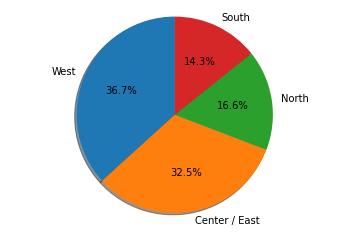

In [13]:
proportion_neighborhood = data["Neighborhood"].value_counts() 
labels = proportion_neighborhood.index
fig, ax = plt.subplots()
ax.pie(proportion_neighborhood, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

In [14]:
data.head()

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,TotalGHGEmissionsLog,SiteEnergyUse(kBtu)Log
0,Hotel,Center / East,1927,1.0,12.0,88434,0,88434,65.0,6981428.0,2023032.0,3686160.0,1272388.0,249.43,2.64,2.396949,6.843944
1,Hotel,Center / East,1996,1.0,11.0,103566,15064,88502,51.0,8354235.0,0.0,3905411.0,4448985.0,263.51,2.38,2.420797,6.921907
2,Hotel,Center / East,1969,1.0,41.0,961990,0,961990,18.0,73130656.0,19660404.0,49762435.0,3709900.0,2061.48,1.92,3.314179,7.864099
3,Hotel,Center / East,1926,1.0,10.0,61320,0,61320,1.0,28229320.0,23458518.0,2769023.0,2001894.0,1936.34,31.38,3.286982,7.450700
4,Hotel,Center / East,1980,1.0,18.0,119890,12460,107430,67.0,14829099.0,0.0,6066245.0,8763105.0,507.70,4.02,2.705607,7.171115


# Encodage de nos variables catégorielles

Nous encodons nos 2 variables catégorielles pour pouvoir les utiliser dans notre algorithme de Machine Learning

In [15]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [16]:
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(data[["Neighborhood"]])
data_neigh =pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_)

In [17]:
data_neigh

,Center / East,North,South,West
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
3286,0.0,0.0,0.0,1.0
3287,1.0,0.0,0.0,0.0
3288,0.0,0.0,0.0,1.0
3289,0.0,0.0,0.0,1.0


In [18]:
pr_style = OneHotEncoder()
pr_results = pr_style.fit_transform(data[["PrimaryPropertyType"]])
data_pr=pd.DataFrame(pr_results.toarray(), columns=pr_style.categories_)

In [19]:
data_pr.reset_index().columns

MultiIndex([(           'index',),
            (      'Commercial',),
            (       'Education',),
            (          'Family',),
            (           'Hotel',),
            (         'Medical',),
            (          'Office',),
            (           'Other',),
            (         'Storage',),
            ('Worship Facility',)],
           )

# Concaténation 

In [20]:
data.reset_index(inplace=True, drop=True)

In [21]:
data = pd.concat([data,data_neigh, data_pr],axis=1)

In [22]:
data.dropna(axis=0, inplace=True)

In [23]:
data.head()

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),...,"(West,)","(Commercial,)","(Education,)","(Family,)","(Hotel,)","(Medical,)","(Office,)","(Other,)","(Storage,)","(Worship Facility,)"
0,Hotel,Center / East,1927,1.0,12.0,88434,0,88434,65.0,6981428.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Hotel,Center / East,1996,1.0,11.0,103566,15064,88502,51.0,8354235.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Hotel,Center / East,1969,1.0,41.0,961990,0,961990,18.0,73130656.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Hotel,Center / East,1926,1.0,10.0,61320,0,61320,1.0,28229320.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Hotel,Center / East,1980,1.0,18.0,119890,12460,107430,67.0,14829099.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
data.columns

Index([   'PrimaryPropertyType',           'Neighborhood',
                    'YearBuilt',      'NumberofBuildings',
               'NumberofFloors',       'PropertyGFATotal',
           'PropertyGFAParking', 'PropertyGFABuilding(s)',
              'ENERGYSTARScore',    'SiteEnergyUse(kBtu)',
               'SteamUse(kBtu)',      'Electricity(kBtu)',
             'NaturalGas(kBtu)',      'TotalGHGEmissions',
        'GHGEmissionsIntensity',   'TotalGHGEmissionsLog',
       'SiteEnergyUse(kBtu)Log',       ('Center / East',),
                     ('North',),               ('South',),
                      ('West',),          ('Commercial',),
                 ('Education',),              ('Family',),
                     ('Hotel',),             ('Medical',),
                    ('Office',),               ('Other',),
                   ('Storage',),    ('Worship Facility',)],
      dtype='object')

Maintenant qu'on a transformé les variables catégorielles et normalisé les variables, on définit les variables que nous allons entrainer X et les variables que nous voulons prédire y. On commence par la consommation d'énergie (ramenée en Log) puis on fera une analyse sur le carbone avec la régression qu'on aura choisie.

In [25]:
X=data[['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
('Center / East',),('North',),('South',),('West',),('Commercial',),('Education',),('Family',), ('Hotel',),('Medical',),
('Office',),('Other',),('Storage',),('Worship Facility',)]]

C:\Users\nha5600\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [26]:
y=data['SiteEnergyUse(kBtu)Log']

In [27]:
y.describe()

count    2195.000000
mean        6.487721
std         0.555478
min         4.642890
25%         6.106444
50%         6.415298
75%         6.860058
max         8.651651
Name: SiteEnergyUse(kBtu)Log, dtype: float64

In [28]:
X.shape,y.shape

((2195, 19), (2195,))

In [29]:
X.isna().sum()

YearBuilt                 0
NumberofBuildings         0
NumberofFloors            0
PropertyGFATotal          0
PropertyGFAParking        0
PropertyGFABuilding(s)    0
(Center / East,)          0
(North,)                  0
(South,)                  0
(West,)                   0
(Commercial,)             0
(Education,)              0
(Family,)                 0
(Hotel,)                  0
(Medical,)                0
(Office,)                 0
(Other,)                  0
(Storage,)                0
(Worship Facility,)       0
dtype: int64

In [30]:
y.isna().sum()

0

# Décomposition et standardisation

In [31]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

Nous séparons les données en train/test pour les évaluer de façon pertinente. L'objectif est de détecter l'overfitting et le surapprentissage.

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [33]:
X.shape, y.shape

((2195, 19), (2195,))

In [34]:
std_scale=preprocessing.StandardScaler().fit(X_train)

In [35]:
X_scale_train=std_scale.transform(X_train)

In [36]:
X_scale_test=std_scale.transform(X_test)

In [37]:
X_scale_train.shape,X_scale_test.shape

((1536, 19), (659, 19))

In [38]:
X_scale_train.mean(),X_scale_test.mean()

(1.1826553381834865e-16, 0.004635254815741611)

In [39]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_train = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

# Test 1 : Régression classique

On importe les éléments pour effectuer notre régression linéaire classique pour avoir notre MSE et la déviation standard. Nous comparerons les éléments obtenus avec une autre régression linéaire (Ridge), ainsi qu'une régression linéaire la Random Forest.

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Pour la régression linéaire, la sélection et l'évaluation de modèles se fait à l'aide du modèle de selection cross_val_score, où nous choisissons un paramètre de scoring qui est "neg mean squared error".

In [41]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
score=cross_val_score(lr,X_scale_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [42]:
X.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),"(Center / East,)","(North,)","(South,)","(West,)","(Commercial,)","(Education,)","(Family,)","(Hotel,)","(Medical,)","(Office,)","(Other,)","(Storage,)","(Worship Facility,)"
count,2195.000000,2195.000000,2195.000000,2.195000e+03,2195.000000,2.195000e+03,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000
mean,1963.515262,1.025968,4.824146,1.243206e+05,15388.466059,1.089322e+05,0.323462,0.172210,0.153531,0.350797,0.170387,0.130752,0.000456,0.065148,0.059681,0.368565,0.010478,0.134852,0.059681
std,31.789891,0.364515,7.803539,2.034083e+05,46089.248879,1.761569e+05,0.467904,0.377649,0.360580,0.477328,0.376058,0.337205,0.021344,0.246843,0.236949,0.482526,0.101849,0.341643,0.236949
min,1900.000000,1.000000,0.000000,1.229400e+04,-2.000000,-4.331000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1938.000000,1.000000,1.000000,3.230300e+04,0.000000,3.072650e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1968.000000,1.000000,3.000000,5.421100e+04,0.000000,5.137400e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1989.000000,1.000000,5.000000,1.224000e+05,0.000000,1.051000e+05,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2015.000000,9.000000,99.000000,1.952220e+06,512608.000000,1.765970e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


D'autres indicateurs de performance sont explorés pour comprendre les résultats : On cherche à mesurer le temps déxécution

In [43]:
import timeit 
from sklearn import linear_model
start_time=timeit.default_timer()
lr=linear_model.LinearRegression()
lr.fit(X_scale_train,y_train)

LinearRegression()

La MSE permet de regarder le modele qui fait le plus d'erreur : 

In [44]:
y_predi_lr = lr.predict(X_scale_test)
MSELinear = mean_squared_error(y_test,y_predi_lr)
print('Notre MSE est égal à %0.2f' %MSELinear)

Notre MSE est égal à 0.14


La MAPE permet de regarder le modele :

In [45]:
#mae = mean_absolute_error(y_test, y_predi)
#print('MAE: %.3f' % mae)
mapeLinear= mean_absolute_percentage_error(y_test, y_predi_lr) * 100
print('MAPE :' ,mapeLinear)

MAPE : 4.6010808868551205


Nous effectuons une prédiction sur y avec la régression linéiare :

In [46]:
y_predi_lr = lr.predict(X_scale_test) 
erreur=y_predi_lr-y_test 

La RMSE permet de calculer les différences entre les valeurs prédites par notre modèle et les valeurs observées

In [47]:
rmseLinear = (np.sqrt(mean_squared_error(y_test, y_predi_lr)))
print('RMSE :' , rmseLinear)

RMSE : 0.3744340821518053


In [48]:
rmseLinear_Train = (np.sqrt(mean_squared_error(y_train, lr.predict(X_scale_train))))
print('RMSE :' , rmseLinear_Train)

RMSE : 0.3587812891162007


Récup du modèle et booster avec Gridsearch

In [49]:
elapsedLinear=timeit.default_timer()-start_time
# Evaluation du training set
print('temps de calcul',elapsedLinear)

temps de calcul 23.221285800000032


In [50]:
print('Train Score :', lr.score(X_scale_train,y_train))
print('Test Score :', lr.score(X_scale_test,y_test))

Train Score : 0.5781839381938246
Test Score : 0.5559876654575899


In [51]:
r2linear = r2_score(y_test, y_predi_lr)
print ('R2 Linear :', r2linear)

R2 Linear : 0.5559876654575899


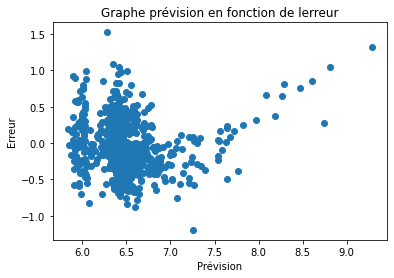

In [52]:
plt.figure()
plt.scatter(y_predi_lr,erreur)
plt.xlabel('Prévision')
plt.ylabel('Erreur')
plt.title('Graphe prévision en fonction de lerreur')
plt.show()

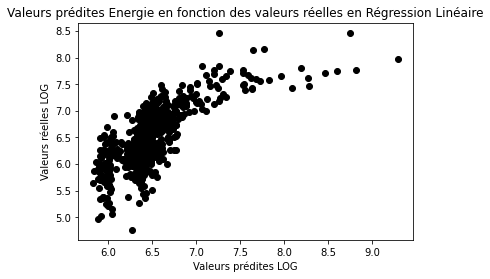

In [53]:
plt.figure()
plt.scatter(y_predi_lr,y_test,c='black')
plt.xlabel('Valeurs prédites LOG')
plt.ylabel('Valeurs réelles LOG')
plt.title('Valeurs prédites Energie en fonction des valeurs réelles en Régression Linéaire')
plt.show()

# Régression Ridge

Testons maintenant la régression Ridge pour évaluer nos 3 paramètres sélectionnés :

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge

In [55]:
from sklearn.linear_model import RidgeCV
model_ridge = RidgeCV(alphas=np.logspace(-1,2,100),cv=5, scoring='neg_mean_squared_error')
model_ridge.fit(X_scale_train, y_train)
print('alpha: %f' % model_ridge.alpha_)

alpha: 35.111917


In [56]:
ridge=linear_model.Ridge()
ridge.fit(X_scale_train,y_train)

Ridge()

In [57]:
score=cross_val_score(ridge,X_scale_train,y_train,scoring='neg_mean_squared_error',cv=5)
print(abs(score))

[0.14488399 0.13325213 0.1086494  0.13565563 0.13823128]


In [58]:
model_ridge.best_score_

-0.132068447156668

Cherchons l'écart type moyen :

In [59]:
print("%0.3f MSE with a standard deviation of %0.3f" % (abs(score).mean(), abs(score).std()))

0.132 MSE with a standard deviation of 0.012


In [60]:
y_predi_ridge = ridge.predict(X_scale_test)
MSERidge=mean_squared_error(y_test,ridge.predict(X_scale_test))
print('Notre MSE avec la régression Ridge est égale à', MSERidge)

Notre MSE avec la régression Ridge est égale à 0.14020986079985837


In [61]:
print('Train Score :', ridge.score(X_scale_train,y_train))
print('Test Score :', ridge.score(X_scale_test,y_test))

Train Score : 0.5781838322844424
Test Score : 0.5559592294555715


Calculons maintenant la mapeRidge :

In [62]:
mapeRidge= mean_absolute_percentage_error(y_test,y_predi_ridge) * 100
print('MAPE :' ,mapeRidge)

MAPE : 4.601285842838541


Interpréter le MAPE

In [63]:
rmseRidge = (np.sqrt(mean_squared_error(y_test, y_predi_ridge)))
print ('RMSE :', rmseRidge)

RMSE : 0.3744460719514338


In [64]:
r2ridge = r2_score(y_test, y_predi_ridge)
print ('R2 Ridge :', r2ridge)

R2 Ridge : 0.5559592294555715


In [65]:
elapsedRidge=timeit.default_timer()-start_time
elapsedRidge

97.8832754

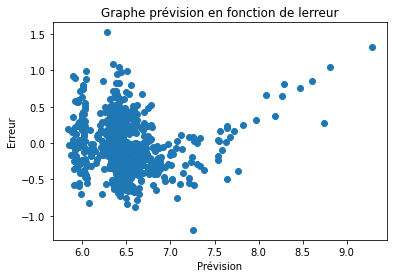

In [66]:
plt.figure()
plt.scatter(y_predi_ridge,erreur)
plt.xlabel('Prévision')
plt.ylabel('Erreur')
plt.title('Graphe prévision en fonction de lerreur')
plt.show()

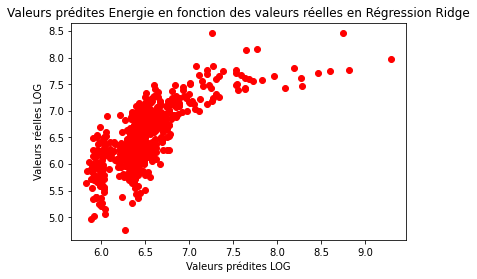

In [67]:
plt.figure()
plt.scatter(y_predi_ridge,y_test,c='red')
plt.xlabel('Valeurs prédites LOG')
plt.ylabel('Valeurs réelles LOG')
plt.title('Valeurs prédites Energie en fonction des valeurs réelles en Régression Ridge')
plt.show()

# Non linéaire : Random Forest

Nous nous intéressons maintenant à un modèle non linéaire : Le Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

Text(0, 0.5, 'Score MSE')

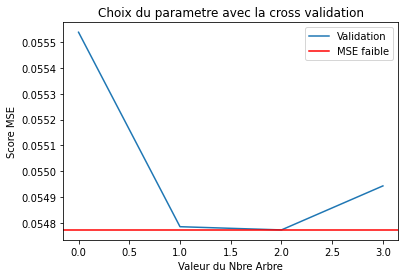

In [69]:
val_score=[]
nbrarbres=[50,100,150,200]
for k in nbrarbres:
    randomForest=RandomForestRegressor(random_state=50,bootstrap=True,n_estimators=k)
    score=cross_val_score(randomForest,X_scale_train,y_train,scoring='neg_mean_squared_error',cv=5).mean()
    score=abs(score)
    val_score.append(score)
plt.figure()
plt.plot(val_score,label='Validation')
plt.axhline(y=min(val_score), color='r',label='MSE faible')
plt.title('Choix du parametre avec la cross validation')
plt.legend()
plt.xlabel('Valeur du Nbre Arbre')
plt.ylabel('Score MSE')

On effectue un controle aleatoire present dans l'algorithme du modele.
Nous faisons une recherche exhaustive sur les valeurs des paramètres spécifiées pour notre estimateur grâce à la fonction Gridsearch.
Le nombre d'estimateurs est le nombre darbres. Plus il y a des arbres, plus le modele sera precis.
On utilise des arbres peu profonds et peu grands en vue de gagner en performance. L'idée est d'éviter l'overfitting (pas trop profond) et le surapprentissage (pas trop grand). Les variables sélectionnées sont diverses et indépendantes.

In [70]:
from sklearn.model_selection import GridSearchCV
modelrf=RandomForestRegressor(bootstrap=True,random_state=50)
params = {'n_estimators':[50,100,150,200]}
grid=GridSearchCV(modelrf,param_grid=params,cv=5,return_train_score=True)

In [71]:
start_time=timeit.default_timer()

In [72]:
grid.fit(X_scale_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=50),
             param_grid={'n_estimators': [50, 100, 150, 200]},
             return_train_score=True)

In [73]:
grid.best_params_

{'n_estimators': 100}

In [74]:
grid.best_score_

0.8201786849024719

Nous calculons comme sur nos régressions précédentes :

In [75]:
model_rf=grid.best_estimator_
y_predi_random=model_rf.predict(X_scale_test)
MSERandom=mean_squared_error(y_test,y_predi_random)
print('Notre MSE est égal à %0.2f' %MSERandom)

Notre MSE est égal à 0.06


In [76]:
mapeRandom= mean_absolute_percentage_error(y_test,y_predi_random) * 100
print('MAPE :' ,mapeRandom)

MAPE : 2.446750698414428


Evaluation du training set :

In [77]:
elapsedRandom=timeit.default_timer()-start_time
print('temps de calcul',elapsedRandom)

temps de calcul 35.37127800000002


In [78]:
rmseRandom = (np.sqrt(mean_squared_error(y_test, y_predi_random)))
print('RMSE {}'.format(rmseRandom))
print('Train Score :', model_rf.score(X_scale_train,y_train))
print('Test Score :', model_rf.score(X_scale_test,y_test))

RMSE 0.23699087063033888
Train Score : 0.9754376064958472
Test Score : 0.822128027027502


In [79]:
rmseRandom = (np.sqrt(mean_squared_error(y_test, y_predi_random)))
r2Random = r2_score(y_test, y_predi_random)
print('R2 {}'.format(r2Random))

R2 0.822128027027502


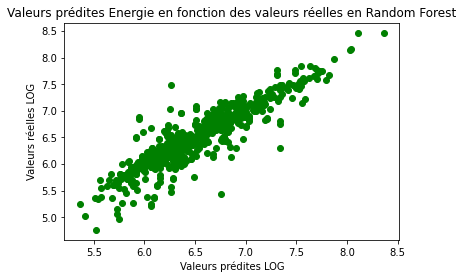

In [80]:
plt.figure()
plt.scatter(y_predi_random,y_test,c='green')
plt.xlabel('Valeurs prédites LOG')
plt.ylabel('Valeurs réelles LOG')
plt.title('Valeurs prédites Energie en fonction des valeurs réelles en Random Forest')
plt.show()

L'objectif est de comparer nos 3 régressions. Réalisons un tableau avec nos métriques pour pouvoir analyser quelle régression est celle à privilégier pour notre modèle.

In [81]:
comparaison = pd.DataFrame({'Modèle': ['RegréssionClassique', 'Ridge','Random Forest'],'MSE':[MSELinear,MSERidge,MSERandom],'MAPE (%)':[mapeLinear,mapeRidge,mapeRandom],'RMSE':[rmseLinear,rmseRidge,rmseRandom], 'R2' : [r2linear,r2ridge,r2Random], 'Tps éxécution (s)':[elapsedLinear,elapsedRidge,elapsedRandom]})

In [82]:
comparaison

,Modèle,MSE,MAPE (%),RMSE,R2,Tps éxécution (s)
0,RegréssionClassique,0.140201,4.601081,0.374434,0.555988,23.221286
1,Ridge,0.140210,4.601286,0.374446,0.555959,97.883275
2,Random Forest,0.056165,2.446751,0.236991,0.822128,35.371278


Le tableau comparatif étant tracé, nous pouvons aller plus loin en effectuant une représentation graphique sur nos métriques.

In [83]:
performances_modeles = pd.melt(comparaison.reset_index(), id_vars = ['Modèle'], value_name = 'score', value_vars=['MSE','MAPE (%)', 'RMSE', 'R2'])

In [84]:
performances_modeles

,Modèle,variable,score
0,RegréssionClassique,MSE,0.140201
1,Ridge,MSE,0.140210
2,Random Forest,MSE,0.056165
3,RegréssionClassique,MAPE (%),4.601081
4,Ridge,MAPE (%),4.601286
5,Random Forest,MAPE (%),2.446751
6,RegréssionClassique,RMSE,0.374434
7,Ridge,RMSE,0.374446
8,Random Forest,RMSE,0.236991
9,RegréssionClassique,R2,0.555988


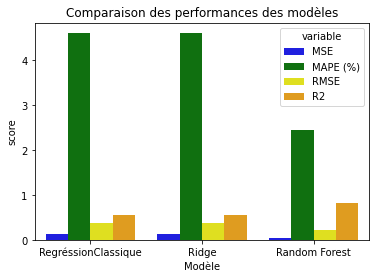

In [85]:
plt.figure()
sns.barplot(x = performances_modeles['Modèle'],
            y = performances_modeles['score'], hue = performances_modeles['variable'],palette=['blue','green', 'yellow','orange']);
plt.title('Comparaison des performances des modèles');

Clairement, nous voyons que le modèle Random Forest est le mieux adapté pour notre étude : Celui avec le MSE et le RMSE le plus proche de 0, le MAPE le plus petit et le coefficient de détermination R2 le plus proche. 
Comparons maintenant le temps d'exécution entre les régressions :

In [86]:
time_comparator = pd.melt(comparaison.reset_index(), id_vars = ['Modèle'], value_name = 'score', value_vars=['Tps éxécution (s)'])

In [87]:
time_comparator

,Modèle,variable,score
0,RegréssionClassique,Tps éxécution (s),23.221286
1,Ridge,Tps éxécution (s),97.883275
2,Random Forest,Tps éxécution (s),35.371278


Text(0.5, 1.0, 'Comparaison des performances de temps des modèles')

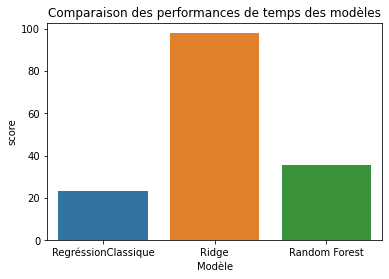

In [88]:
plt.figure()
sns.barplot(x = time_comparator['Modèle'],
            y = time_comparator['score']);
plt.title('Comparaison des performances de temps des modèles')

Nous concluons donc que le modèle Random Forest est le modèle qui peut être le plus adapté pour nos prédictions, au vue de la valeur du coefficient de détermination R2 qui se rapproche de 1 et des valeurs du MSE,RMSE qui se rapprochent plutot de 0, mais aussi pour le temps d'execution faible. Nous utiliserons donc ce modèle pour prédire le C02.

# Evaluation du modèle choisi (Dummy)

In [89]:
from sklearn import dummy
dummy = dummy.DummyRegressor(strategy='median')
dummy.fit(X_scale_train, y_train)

DummyRegressor(strategy='median')

Prédiction sur le jeu de test : 

In [90]:
y_pred_dummy = dummy.predict(X_scale_test)

Evaluation du MSE : 

In [91]:
print("MSE : {:.2f}".format(mean_squared_error(y_test, y_pred_dummy)),',Valeur dans la Regression Random Forest',MSERandom)

MSE : 0.33 ,Valeur dans la Regression Random Forest 0.05616467276212602


# Prédiction CO2

In [92]:
X_CO2=data[['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
('Center / East',),('North',),('South',),('West',),('Commercial',),('Education',),('Family',),('Hotel',),('Medical',),
('Office',),('Other',),('Storage',),('Worship Facility',) ]]

C:\Users\nha5600\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [93]:
y_CO2 = data['TotalGHGEmissionsLog']

A noter que le standard scaler est sensible aux outliers, c'est la raison pour laquelle nous avons fait une transformation en log.
(Robust scaler = x-mediane/ ecart interquartille)

In [94]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_CO2,y_CO2,test_size=0.30)
std_scale=preprocessing.StandardScaler().fit(X_train)
X_scale_train=std_scale.transform(X_train)
X_scale_test=std_scale.transform(X_test)

De la même manière que pour l'énergie, nous raisonnons sur le modèle Random Forest pour estimer les valeurs du CO2.

In [96]:
modelrf=RandomForestRegressor(bootstrap=True,random_state=50)
params = {'n_estimators':[50,100,150,200]}
grid=GridSearchCV(modelrf,param_grid=params,cv=5,return_train_score=True,scoring='neg_mean_squared_error')
grid.fit(X_scale_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=50),
             param_grid={'n_estimators': [50, 100, 150, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [97]:
rf = grid.best_estimator_
rf

RandomForestRegressor(n_estimators=200, random_state=50)

Nous établissons maintenant de la même manière que sur l'énergie nos calculs sur le MSE, le RMSE, le R2 et le MAPE :

In [98]:
y_predCo2 = rf.predict(X_scale_test)
mseCO2 = mean_squared_error(y_test,y_predCo2)
print(' MSE Random Forest pour le CO2 :', mseCO2)

 MSE Random Forest pour le CO2 : 0.07996610714456326


In [99]:
maeCO2 = mean_absolute_error(y_test, y_predCo2)
print('MAE Random Forest pour le CO2: %.3f' % maeCO2)

MAE Random Forest pour le CO2: 0.194


In [100]:
mapeCO2= mean_absolute_percentage_error(y_test, y_predCo2) * 100
print('MAPE Random Forest pour le CO2 :' ,mapeCO2)

MAPE Random Forest pour le CO2 : 26.329137434321765


In [101]:
rmseCO2 = (np.sqrt(mean_squared_error(y_test, y_predCo2)))
print('MAPE Random Forest pour le CO2 :' , rmseCO2)

MAPE Random Forest pour le CO2 : 0.28278279145761903


In [102]:
r2CO2 = r2_score(y_test, y_predCo2)
print('R2 Random pour le CO2 :' , r2CO2)

R2 Random pour le CO2 : 0.7891614584181166


In [103]:
print('Train Score :', rf.score(X_scale_train,y_train))
print('Test Score :', rf.score(X_scale_test,y_test))

Train Score : 0.9620098022482115
Test Score : 0.7891614584181166


In [104]:
elapsedCO2 = timeit.default_timer()-start_time
print('temps de calcul', elapsedCO2)

temps de calcul 308.1366872


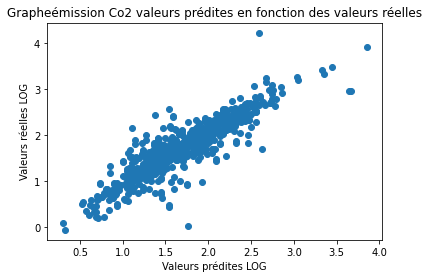

In [105]:
plt.figure()
#sns.lineplot(x = [1.0], y = [1.0], alpha=1)
plt.scatter(y_predCo2,y_test)
plt.xlabel('Valeurs prédites LOG')
plt.ylabel('Valeurs réelles LOG')
plt.title('Grapheémission Co2 valeurs prédites en fonction des valeurs réelles')
plt.show()

# Influence de l'énergy Score

Avant toute chose, nous vérifions si l'EnergyStarScore n'est pas corrélé à notre variable cible, au même titre que les autres variables 

In [106]:
data[['ENERGYSTARScore', 'TotalGHGEmissionsLog']].corr()

,ENERGYSTARScore,TotalGHGEmissionsLog
ENERGYSTARScore,1.000000,-0.154501
TotalGHGEmissionsLog,-0.154501,1.000000


On remarque ici que le score ENERGY STAR ne semble pas avoir de corrélation importante avec les émissions de CO2.
Nous souhaitons également évaluer l’intérêt de l'ENERGY STAR Score' pour la prédiction d’émissions. Nous allons l'ajouter aux variables de notre X pour prédire nos émissions en CO2.

In [107]:
X_energyscore = data[['ENERGYSTARScore', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
('Center / East',),('North',),('South',),('West',),('Commercial',),('Education',),('Family',),('Hotel',),('Medical',),
('Office',),('Other',),('Storage',),('Worship Facility',)]]

C:\Users\nha5600\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [108]:
y_energyscore = data['TotalGHGEmissionsLog']

On filtre les données ayant un Energy Star Score non renseigné pour nos prédictions :

In [109]:
X_energyscore = X_energyscore[X_energyscore['ENERGYSTARScore'].isnull()==False]
y_energyscore = y_energyscore[y_energyscore.index.isin(list(X_energyscore.index))]

In [110]:
X_train,X_test,y_train,y_test=train_test_split(X_energyscore,y_energyscore,test_size=0.30)
std_scale=preprocessing.StandardScaler().fit(X_train)
X_scale_train=std_scale.transform(X_train)
X_scale_test=std_scale.transform(X_test)

Text(0, 0.5, 'Score MSE')

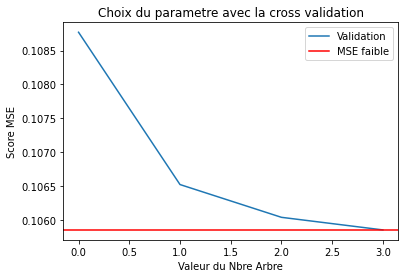

In [111]:
from sklearn.ensemble import RandomForestRegressor

val_score=[]
#cv=KFold(5,shuffle=True,random_state=0)
nbrarbres=[50,100,150,200]
for k in nbrarbres:
    randomForest=RandomForestRegressor(random_state=50,bootstrap=True,n_estimators=k)
    score=cross_val_score(randomForest,X_scale_train,y_train,scoring='neg_mean_squared_error',cv=5).mean()
    score=abs(score)
    val_score.append(score)
    #print('MSE_train CrossValidation : %.3f' %abs(score))
plt.figure()
plt.plot(val_score,label='Validation')
plt.axhline(y=min(val_score), color='r',label='MSE faible')
plt.title('Choix du parametre avec la cross validation')
plt.legend()
plt.xlabel('Valeur du Nbre Arbre')
plt.ylabel('Score MSE')

In [112]:
modelrf=RandomForestRegressor(bootstrap=True,random_state=50)
params = {'n_estimators':[50,100,150,200]}
grid=GridSearchCV(modelrf,param_grid=params,cv=5,return_train_score=True)

In [113]:
start_time=timeit.default_timer()
grid.fit(X_scale_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=50),
             param_grid={'n_estimators': [50, 100, 150, 200]},
             return_train_score=True)

In [114]:
grid.best_score_

0.7497394670811606

In [115]:
grid.best_estimator_

RandomForestRegressor(n_estimators=200, random_state=50)

In [116]:
rf2=rf.fit(X_scale_train,y_train)

In [117]:
y_predi_energy = rf2.predict(X_scale_test)

MSECO2_E =mean_squared_error(y_test,y_predi_energy)
print('Notre MSE avec Energy Star Score est égale à', MSECO2_E)

Notre MSE avec Energy Star Score est égale à 0.08391026506305213


In [118]:
MAECO2_E = mean_absolute_error(y_test, y_predi_energy)
print('Notre MAE avec Energy Star Score est égale à', MAECO2_E )

Notre MAE avec Energy Star Score est égale à 0.20402695675009297


In [119]:
MAPECO2_E = mean_absolute_percentage_error(y_test, y_predi_energy) * 100
print('Notre MAPE avec Energy Star Score est égale à', MAPECO2_E)

Notre MAPE avec Energy Star Score est égale à 20.321791699596396


In [120]:
RMSECO2_E = (np.sqrt(mean_squared_error(y_test, y_predi_energy)))
print('Notre RMSE avec Energy Star Score est égale à', RMSECO2_E)

Notre RMSE avec Energy Star Score est égale à 0.2896726860838835


In [121]:
R2CO2_E = r2_score(y_test, y_predi_energy)
print('Notre R2 coefficient de détermination avec Energy Star Score est égal à', R2CO2_E)

Notre R2 coefficient de détermination avec Energy Star Score est égal à 0.7728025295687044


In [122]:
print('Train Score :', rf2.score(X_scale_train,y_train))
print('Test Score :', rf2.score(X_scale_test,y_test))

Train Score : 0.9693676599722924
Test Score : 0.7728025295687044


In [123]:
elapsedCO2_E = timeit.default_timer()- start_time
print('temps de calcul',elapsedCO2_E)

temps de calcul 54.62809010000001


# Comparaison avec et sans Energy Star Score

Nous comparons les résultats obtenus sur les prédictions avec et sans la variable EnergyStarScore.

In [124]:
resultat_energie =pd.DataFrame({'Energy Star Score': ['Avec', 'Sans'],'MSE':[mseCO2, MSECO2_E],'R2':[r2CO2, R2CO2_E], 'RMSE' : [rmseCO2, RMSECO2_E], 'Tps éxécution (s)':[elapsedCO2, elapsedCO2_E]})

In [125]:
resultat_energie

,Energy Star Score,MSE,R2,RMSE,Tps éxécution (s)
0,Avec,0.079966,0.789161,0.282783,308.136687
1,Sans,0.083910,0.772803,0.289673,54.628090


In [126]:
comparaison_energie = pd.melt(resultat_energie.reset_index(), id_vars = ['Energy Star Score'], value_name = 'score', value_vars=['MSE', 'RMSE', 'R2'])

In [127]:
comparaison_energie

,Energy Star Score,variable,score
0,Avec,MSE,0.079966
1,Sans,MSE,0.083910
2,Avec,RMSE,0.282783
3,Sans,RMSE,0.289673
4,Avec,R2,0.789161
5,Sans,R2,0.772803


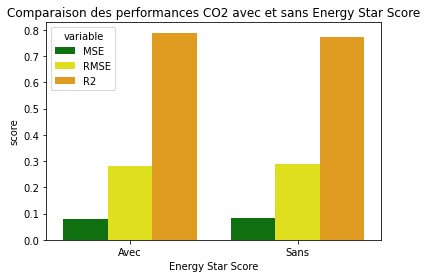

In [128]:
plt.figure()
sns.barplot(x = comparaison_energie['Energy Star Score'],
            y = comparaison_energie['score'], hue = comparaison_energie['variable'],palette=['green', 'yellow','orange']);
plt.title('Comparaison des performances CO2 avec et sans Energy Star Score');

Les métriques ne semblent pas très différentes avec et sans EnergyStarScore. Voyons voir le temps d'execution : 

In [129]:
temps_energie = pd.melt(resultat_energie.reset_index(), id_vars = ['Energy Star Score'], value_name = 'score', value_vars=['Tps éxécution (s)'])

In [130]:
temps_energie

,Energy Star Score,variable,score
0,Avec,Tps éxécution (s),308.136687
1,Sans,Tps éxécution (s),54.628090


Text(0.5, 1.0, 'Comparaison des performances de temps avec et sans Energy Star Score')

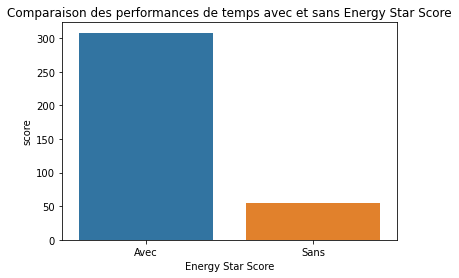

In [131]:
plt.figure()
sns.barplot(x = temps_energie['Energy Star Score'],
            y = temps_energie['score'])

plt.title('Comparaison des performances de temps avec et sans Energy Star Score')

Les métriques ne se sont pas autant améliorées suite à la prise en compte de l'ENERGY STAR Score.
Cette variable est encore très peu renseignée et le jeu de données comporte peu d'entrées. Il est donc difficile de savoir si cette amélioration est rééllement significative. En plus, le temps d'execution sans l'Energy Star Score est bien plus faible. Le bénéfice (vis à vis du coût) de ce score ne sont pas forcément évidents et il serait conseillé pour le moment de ne pas l'utiliser.